## Model Explainability for Credit Data

In [3]:
import sys, os
sys.path.append(os.path.abspath('..'))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap


from sklearn.ensemble import RandomForestClassifier
from src.modeling import feature_engineering, split_data, ensemble_model

c:\Users\mihret.mekbebe\Documents\REQUESTS\KAIM\Fraud-Detection-for-Ecommerce-and-bank-transactions\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Feature Importance

In [4]:
credit = pd.read_csv('../data/raw/creditcard.csv')

# Run feature engineering and capture returned splits (keep duplicate names used later)
X_credit, y_credit = feature_engineering(credit, 'Class')
X_train_credit, X_test_credit, y_train_credit, y_test_credit = split_data(X_credit, y_credit)

rf_credit = ensemble_model(RandomForestClassifier, X_train_credit, y_train_credit)


In [5]:
feature_importance_credit = pd.Series(rf_credit.feature_importances_, index=X_train_credit.columns).sort_values(ascending=False)


Visualize Top 10 Features for Credit Card Data

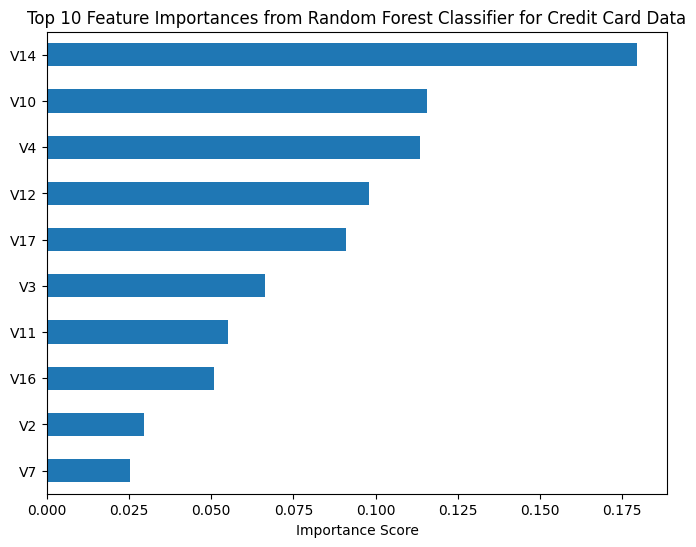

In [6]:
feature_importance_credit.head(10).plot(
    kind='barh',
    figsize=(8, 6),
    title='Top 10 Feature Importances from Random Forest Classifier for Credit Card Data')
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.show()

SHAP Analysis

In [7]:
shap.initjs()
explainer_credit = shap.TreeExplainer(rf_credit)
shap_values_credit = explainer_credit.shap_values(X_test_credit)

SHAP Summary plot

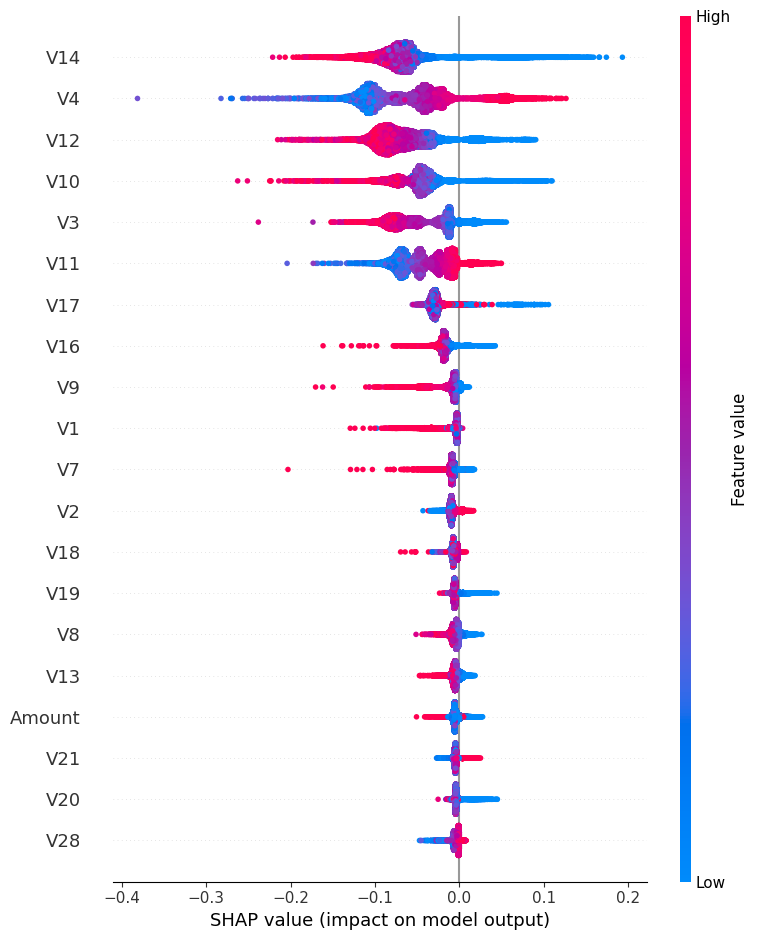

In [8]:
shap.summary_plot(shap_values_credit[:, :, 1], X_test_credit, plot_type="dot")


Force Plots

In [9]:
y_pred_credit = rf_credit.predict(X_test_credit)

True Positives

In [10]:
# Get the index label of the first True Positive
tp_indices = X_test_credit[(y_test_credit == 1) & (y_pred_credit == 1)].index

if len(tp_indices) > 0:
    tp_index_credit = tp_indices[0]
else:
    print("No True Positives found.")

# Use the integer position (iloc) to match the SHAP matrix row
# We find the integer position of our label 'tp_index_credit'
int_pos = X_test_credit.index.get_loc(tp_index_credit)

shap.force_plot(
    explainer_credit.expected_value[1], 
    shap_values_credit[int_pos, :, 1],   # Use the integer position
    X_test_credit.iloc[int_pos]          # Use iloc for the data row
)


False Positive

In [11]:
# Get the index label of the first False Positive
tp_indices = X_test_credit[(y_test_credit == 0) & (y_pred_credit == 1)].index

if len(tp_indices) > 0:
    tp_index_credit = tp_indices[0]
else:
    print("No False Positives found.")

# Use the integer position (iloc) to match the SHAP matrix row
# We find the integer position of our label 'tp_index_credit'
int_pos = X_test_credit.index.get_loc(tp_index_credit)

shap.force_plot(
    explainer_credit.expected_value[1], 
    shap_values_credit[int_pos, :, 1],   # Use the integer position
    X_test_credit.iloc[int_pos]          # Use iloc for the data row
)


False Negative

In [12]:
# Get the index label of the first False Negative
tp_indices = X_test_credit[(y_test_credit == 0) & (y_pred_credit == 0)].index

if len(tp_indices) > 0:
    tp_index_credit = tp_indices[0]
else:
    print("No False Negatives found.")

# Use the integer position (iloc) to match the SHAP matrix row
# We find the integer position of our label 'tp_index_credit'
int_pos = X_test_credit.index.get_loc(tp_index_credit)

shap.force_plot(
    explainer_credit.expected_value[1], 
    shap_values_credit[int_pos, :, 1],   # Use the integer position
    X_test_credit.iloc[int_pos]          # Use iloc for the data row
)


## Model Explainability for Fraud Data

In [13]:
fraud = pd.read_csv('../data/processed/fraud_processed.csv')

X_fraud, y_fraud = feature_engineering(fraud, 'class')
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = split_data(X_fraud, y_fraud)

rf_fraud = ensemble_model(RandomForestClassifier, X_train_fraud, y_train_fraud)


In [14]:
feature_importance_fraud = pd.Series(rf_fraud.feature_importances_, index=X_train_fraud.columns).sort_values(ascending=False)

Visualize Top 10 Features for Fraud Data

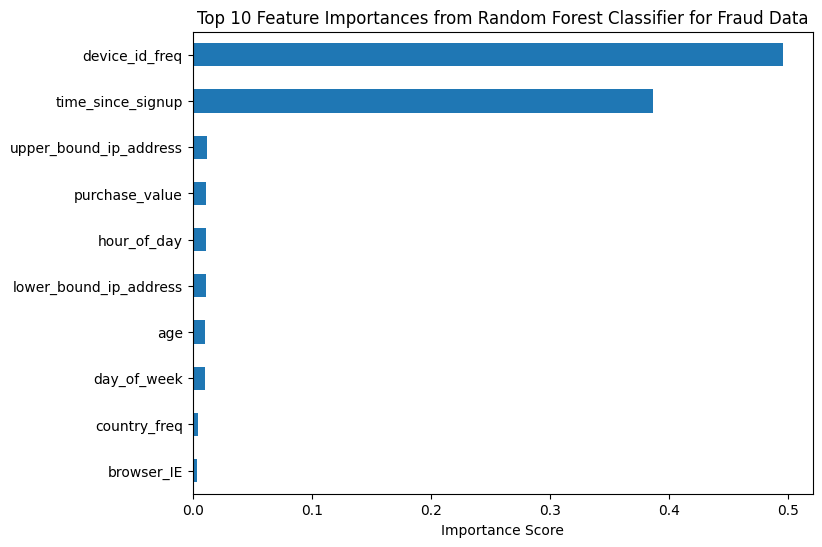

In [15]:
feature_importance_fraud.head(10).plot(
    kind='barh',
    figsize=(8, 6),
    title='Top 10 Feature Importances from Random Forest Classifier for Fraud Data')
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.show()

SHAP Analysis

In [16]:
shap.initjs()
explainer_fraud = shap.TreeExplainer(rf_fraud)
shap_values_fraud = explainer_fraud.shap_values(X_test_fraud)

SHAP Summary plot

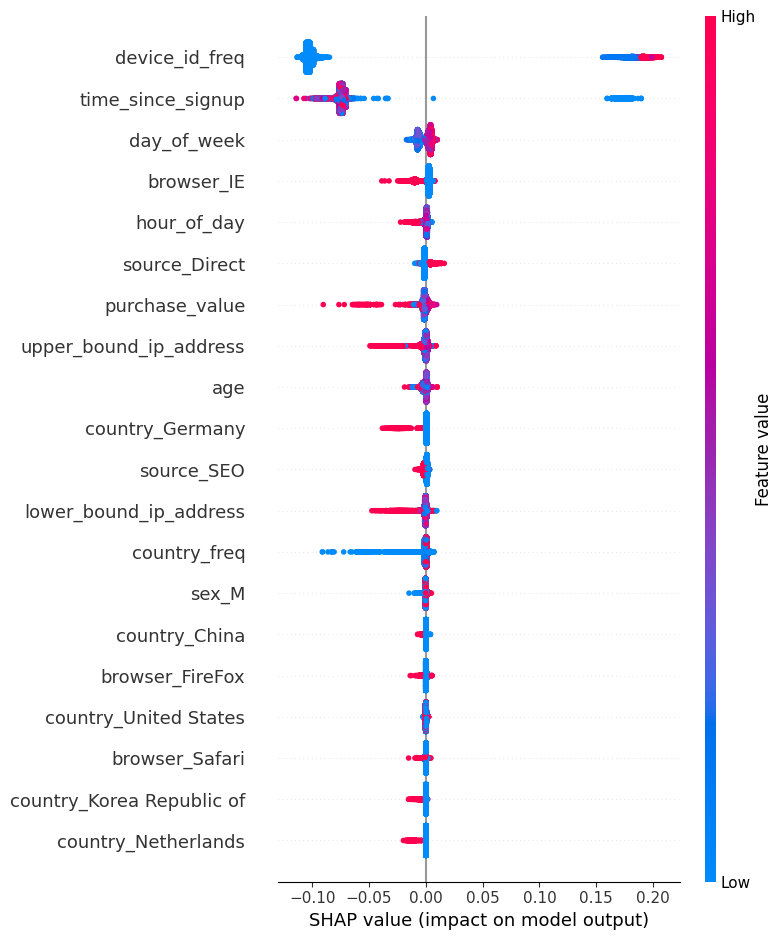

In [17]:
shap.summary_plot(shap_values_fraud[:, :, 1], X_test_fraud, plot_type="dot")



Force Plots

In [18]:
y_pred_fraud = rf_fraud.predict(X_test_fraud)

True Positive

In [19]:
# Get the index label of the first True Positive
tp_indices = X_test_fraud[(y_test_fraud == 1) & (y_pred_fraud == 1)].index

if len(tp_indices) > 0:
    tp_index_fraud = tp_indices[0]
else:
    print("No True Positives found.")

# Use the integer position (iloc) to match the SHAP matrix row
# We find the integer position of our label 'tp_index_fraud'
int_pos = X_test_fraud.index.get_loc(tp_index_fraud)

shap.force_plot(
    explainer_fraud.expected_value[1], 
    shap_values_fraud[int_pos, :, 1],   # Use the integer position
    X_test_fraud.iloc[int_pos]          # Use iloc for the data row
)


False Positive

In [20]:
# Get the index label of the first False Positive
tp_indices = X_test_fraud[(y_test_fraud == 0) & (y_pred_fraud == 1)].index

if len(tp_indices) > 0:
    tp_index_fraud = tp_indices[0]
else:
    print("No True Positives found.")

# Use the integer position (iloc) to match the SHAP matrix row
# We find the integer position of our label 'tp_index_fraud'
int_pos = X_test_fraud.index.get_loc(tp_index_fraud)

shap.force_plot(
    explainer_fraud.expected_value[1], 
    shap_values_fraud[int_pos, :, 1],   # Use the integer position
    X_test_fraud.iloc[int_pos]          # Use iloc for the data row
)


False Negative

In [21]:
# Get the index label of the first False Negative
tp_indices = X_test_fraud[(y_test_fraud == 0) & (y_pred_fraud == 0)].index

if len(tp_indices) > 0:
    tp_index_fraud = tp_indices[0]
else:
    print("No False Negatives found.")

# Use the integer position (iloc) to match the SHAP matrix row
# We find the integer position of our label 'tp_index_fraud'
int_pos = X_test_fraud.index.get_loc(tp_index_fraud)

shap.force_plot(
    explainer_fraud.expected_value[1], 
    shap_values_fraud[int_pos, :, 1],   # Use the integer position
    X_test_fraud.iloc[int_pos]          # Use iloc for the data row
)


In [22]:
# 1. Top 5 Built-in Drivers
builtin_imp = pd.Series(rf_fraud.feature_importances_, index=X_test_fraud.columns)
builtin = builtin_imp.sort_values(ascending=False)
print('\nTop 10 by built-in importance:')
print(builtin.head(10))
# 2. Top 5 SHAP Drivers (Mean Absolute SHAP)
# We use the SHAP values for the fraud class (index 1)
shap_imp = pd.Series(np.abs(shap_values_fraud[:, :, 1]).mean(0), index=X_test_fraud.columns)
shap_vals = shap_imp.sort_values(ascending=False)
print('Top 10 by SHAP (mean |SHAP|):')
print(shap_vals.head(10))


Top 10 by built-in importance:
device_id_freq            0.495847
time_since_signup         0.386279
upper_bound_ip_address    0.012494
purchase_value            0.011408
hour_of_day               0.011061
lower_bound_ip_address    0.010904
age                       0.010634
day_of_week               0.010536
country_freq              0.004437
browser_IE                0.004087
dtype: float64
Top 10 by SHAP (mean |SHAP|):
device_id_freq            0.112580
time_since_signup         0.079243
day_of_week               0.004752
browser_IE                0.004294
hour_of_day               0.001954
source_Direct             0.001873
purchase_value            0.001703
upper_bound_ip_address    0.001620
age                       0.001449
country_Germany           0.001254
dtype: float64


In [23]:
# 1. Top 5 Built-in Drivers
builtin_imp = pd.Series(rf_credit.feature_importances_, index=X_test_credit.columns)
builtin = builtin_imp.sort_values(ascending=False)
print('\nTop 10 by built-in importance:')
print(builtin.head(10))
# 2. Top 5 SHAP Drivers (Mean Absolute SHAP)
# We use the SHAP values for the fraud class (index 1)
shap_imp = pd.Series(np.abs(shap_values_credit[:, :, 1]).mean(0), index=X_test_credit.columns)
shap_vals = shap_imp.sort_values(ascending=False)
print('Top 10 by SHAP (mean |SHAP|):')
print(shap_vals.head(10))


Top 10 by built-in importance:
V14    0.179706
V10    0.115758
V4     0.113505
V12    0.098028
V17    0.091130
V3     0.066368
V11    0.055052
V16    0.050822
V2     0.029468
V7     0.025290
dtype: float64
Top 10 by SHAP (mean |SHAP|):
V14    0.073081
V4     0.069615
V12    0.069327
V10    0.050325
V3     0.048815
V11    0.042364
V17    0.028554
V16    0.017551
V9     0.010336
V1     0.010319
dtype: float64


**Interpretation & Business Recommendations**

- **Comparison (SHAP vs built-in):** SHAP ranks features by their actual contribution to individual predictions (mean |SHAP|), while the built-in Random Forest importance measures average impurity decrease. Overlap between the two indicates stable, robust drivers; differences highlight features that strongly affect predictions for particular customers but may not be used as frequently to split trees.

- **Top 5 Drivers (SHAP):** 
For the Credit dataset the Top 5 drivers were : V14, V4, V12, V10, V3
For the Fraud dataset the Top 5 drivers were : device_id_freq, time_since_signup, day_of_week, browser_IE, hour_of_day
These are the most influential features pushing predictions toward fraud on average.

- **Surprising / Counterintuitive Findings:**
  - Feature V3 from Credit data and features day_of_week and browser_IE from Fraud data, show strong local drivers (influential for certain records) but not global splitters — investigate them for cohort-specific fraud patterns.
  - Conversely, features high in built-in but low in SHAP may contribute to tree structure but have smaller additive effects on the fraud probability for individual cases.

- **Actionable Recommendations (connected to SHAP insights):**
  - **Add step-up verification for transactions within X hours of signup:** Given that `time_since_signup` is a top SHAP driver, it requires additional verification for transactions occurring shortly after signup — SHAP shows this increases predicted fraud probability.
  - **Monitor and throttle unusual device or velocity signals:** Given that feature `device_id_freq` is a strong SHAP driver, implement rate limiting or step-up authentication when their values exceed thresholds.
  - **Build targeted rules from SHAP cohorts:** For features that are surprising (high SHAP, low built-in), create targeted rules for the specific cohorts where those features matter (e.g., certain merchant categories or customer segments).

